<a href="https://colab.research.google.com/github/robertdc2/IS-170-Machine-Learning/blob/9.-Regression-Analysis/Sanchez_HW_9_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robert Sanchez
# HW 9 Regression Models

In [ ]:
#titanic survivors - there are three independent variables
#and one dependent variable - purchased(1) or not(0).

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving titanic_survivors.csv to titanic_survivors.csv


In [ ]:
data_set=pd.read_csv('titanic_survivors.csv')
data_set

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,886,887,0,1,0.3375,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
96,887,888,1,0,0.2375,0.058556,1,0,0,0.0,0,0,0,1,0,0,1
97,888,889,0,0,0.3500,0.045771,0,0,1,0.3,0,0,0,1,0,0,1
98,889,890,1,1,0.3250,0.058556,1,0,0,0.0,1,0,0,0,1,0,0


In [ ]:
# column#2 and column#3 are the two independent variables 
#and column#4 is the dependent variable
x=data_set.iloc[:,[2,3]].values
y=data_set.iloc[:,6].values

In [ ]:
#splitting the dataset into training and test sets.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.5)

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [ ]:
#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#For more info on the LogitsticRegression and its parameters, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#andom_state: Whenever randomization is part of a Scikit-learn algorithm, a random_state parameter may be provided to control the random number generator used. 
#Note that the mere presence of random_state doesn’t mean that randomization is always used, as it may be dependent on another parameter, e.g. shuffle, being set.
#The passed value will have an effect on the reproducibility of the results returned by the function

LogisticRegression(random_state=0)

In [ ]:
LogisticRegression(C=1.0,class_weight=None, dual=False,fit_intercept=True,
                   intercept_scaling=1,l1_ratio=None, max_iter=100,
                   multi_class='warn',n_jobs=None,penalty=12,
                   random_state=0,solver='warn',tol=0.0001,verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty=12, random_state=0,
                   solver='warn')

In [ ]:
#predicting the test set result
y_pred=classifier.predict(x_test)

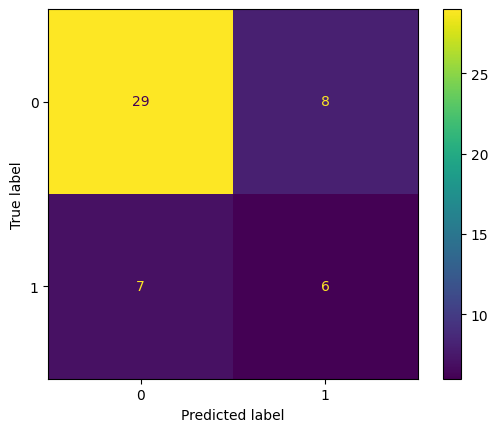

In [ ]:
#Creating the confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Based on the confusion matrix results. 

True positive: 29 records of titanic survivors crash were predicted correctly by the model.

False-positive: 8 records of titanic passengers were wrongly predicted as survivors.

False-negative: 7 records of titanic passengers were wrongly predicted as no survivors.

True Negative: 6 records of no titanic survivors were predicted correctly by the model.